# Milestone 1
#### -Data Collection
#### -Data Exploration
#### -Dara Preprocessing

## Data Collection
We obtained high-quality data from [Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download), which is well-suited for use in this project.

## Data Exploration

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
data= 'Data/diabetes_prediction_dataset.csv'
df= pd.read_csv(data)
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


This step to know how many value is No info about smoking_history

In [31]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Convert No info value to null to make imputation

In [32]:
def smoking_history(x):
    if x == 'No Info':
        return np.nan
    return x
df['smoking_history'] = df['smoking_history'].apply(smoking_history)
df['smoking_history'].isnull().sum()


np.int64(35816)

In [33]:
#now we can see that the missing values are replaced with NaN
#we can also check the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.sort_values(ascending=False)


smoking_history        35.816
gender                  0.000
age                     0.000
hypertension            0.000
heart_disease           0.000
bmi                     0.000
HbA1c_level             0.000
blood_glucose_level     0.000
diabetes                0.000
dtype: float64

Now, we have **35.813% missing values** in the `smoking_history` column. Let's proceed with **imputing** those missing values to maintain data quality and ensure better model performance.

Now, let's perform KNN imputation based on the age and BMI columns.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

df_copy = df.copy()
encoder = OrdinalEncoder()
df_copy['smoking_history_encoded'] = encoder.fit_transform(df_copy[['smoking_history']])

features = ['age', 'bmi', 'smoking_history_encoded']
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df_copy[features])

df_copy['smoking_history'] = encoder.inverse_transform(imputed_data[:, [2]])[:, 0]

df_copy.drop('smoking_history_encoded', axis=1, inplace=True)

df_copy['smoking_history'].value_counts()

smoking_history
never          53943
former         21708
current        10229
ever            7606
not current     6514
Name: count, dtype: int64

In [41]:
df_copy.drop('smoking_history_encoded', axis=1, inplace=True)

In [42]:
df= df_copy.copy()
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,current,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,former,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Now lets identify key features, abd the distribution of the data and any patterbs

In [46]:
#identifying key features
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


C:\Users\youss\AppData\Local\Temp\ipykernel_1876\2428508778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette='Set2')


<Axes: xlabel='hypertension', ylabel='count'>

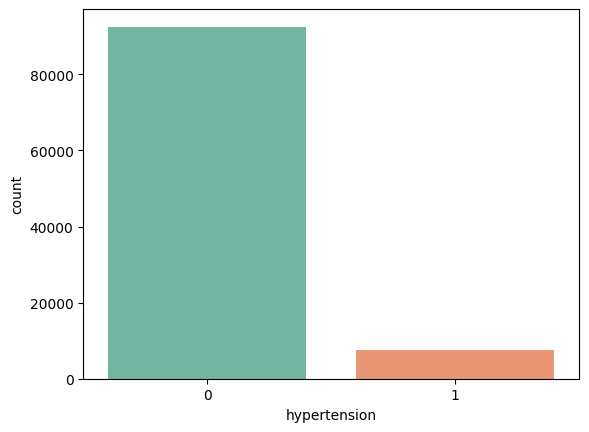

In [47]:
sns.countplot(x='hypertension', data=df, palette='Set2')

In [50]:
hones=df[df['hypertension'] == 1]['hypertension'].count()
percentageOfHypertension = (hones / 100000) * 100
print(percentageOfHypertension)

7.485


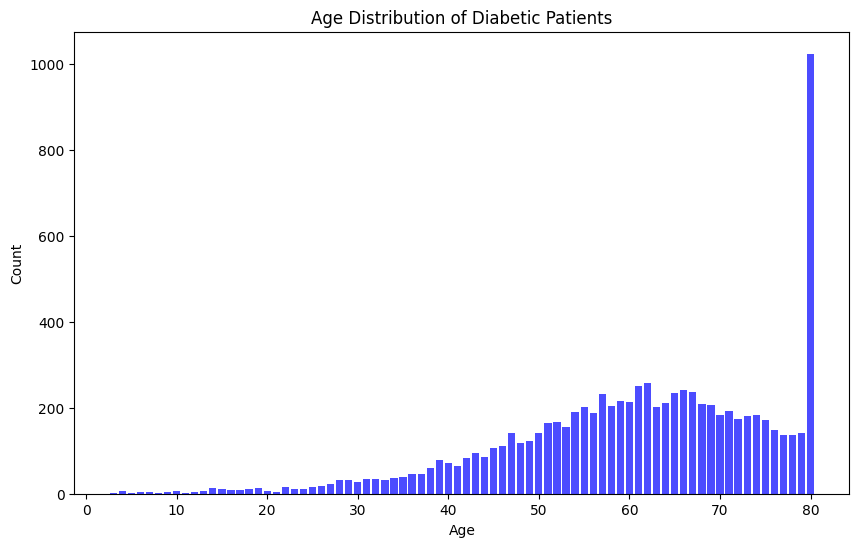

In [74]:
plt.figure(figsize=(10, 6))
df[df['diabetes'] == 1]['age'].value_counts()
plt.bar(df[df['diabetes'] == 1]['age'].value_counts().index, df[df['diabetes'] == 1]['age'].value_counts().values, color='blue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Diabetic Patients')
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_1876\2603115697.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=df[df['diabetes']==1]['age'], palette='Set2')


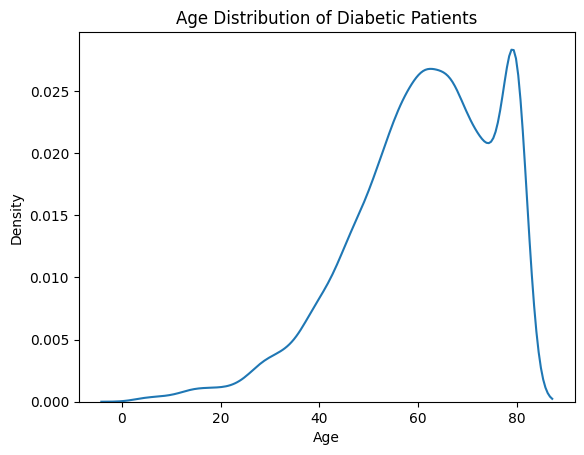

In [78]:
sns.kdeplot(x=df[df['diabetes']==1]['age'], palette='Set2')
plt.title('Age Distribution of Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Text(0.5, 0, 'Diabetes')

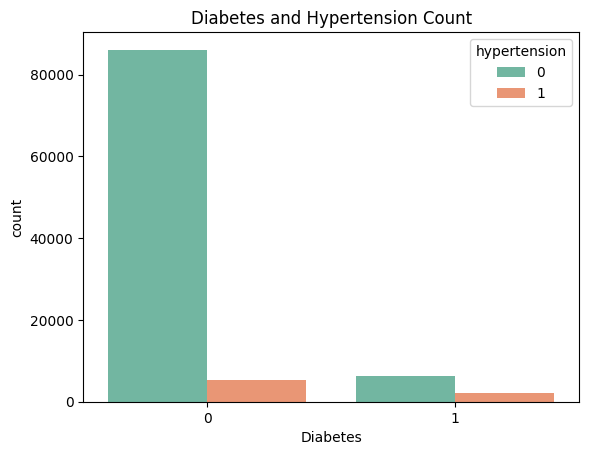

In [82]:
sns.countplot(x='diabetes', hue='hypertension', data=df, palette='Set2')
plt.title('Diabetes and Hypertension Count')
plt.xlabel('Diabetes')

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
56.10        1
50.27        1
55.04        1
56.65        1
53.37        1
Name: count, Length: 4247, dtype: int64

Text(0.5, 1.0, 'Pairplot of Features with Diabetes')

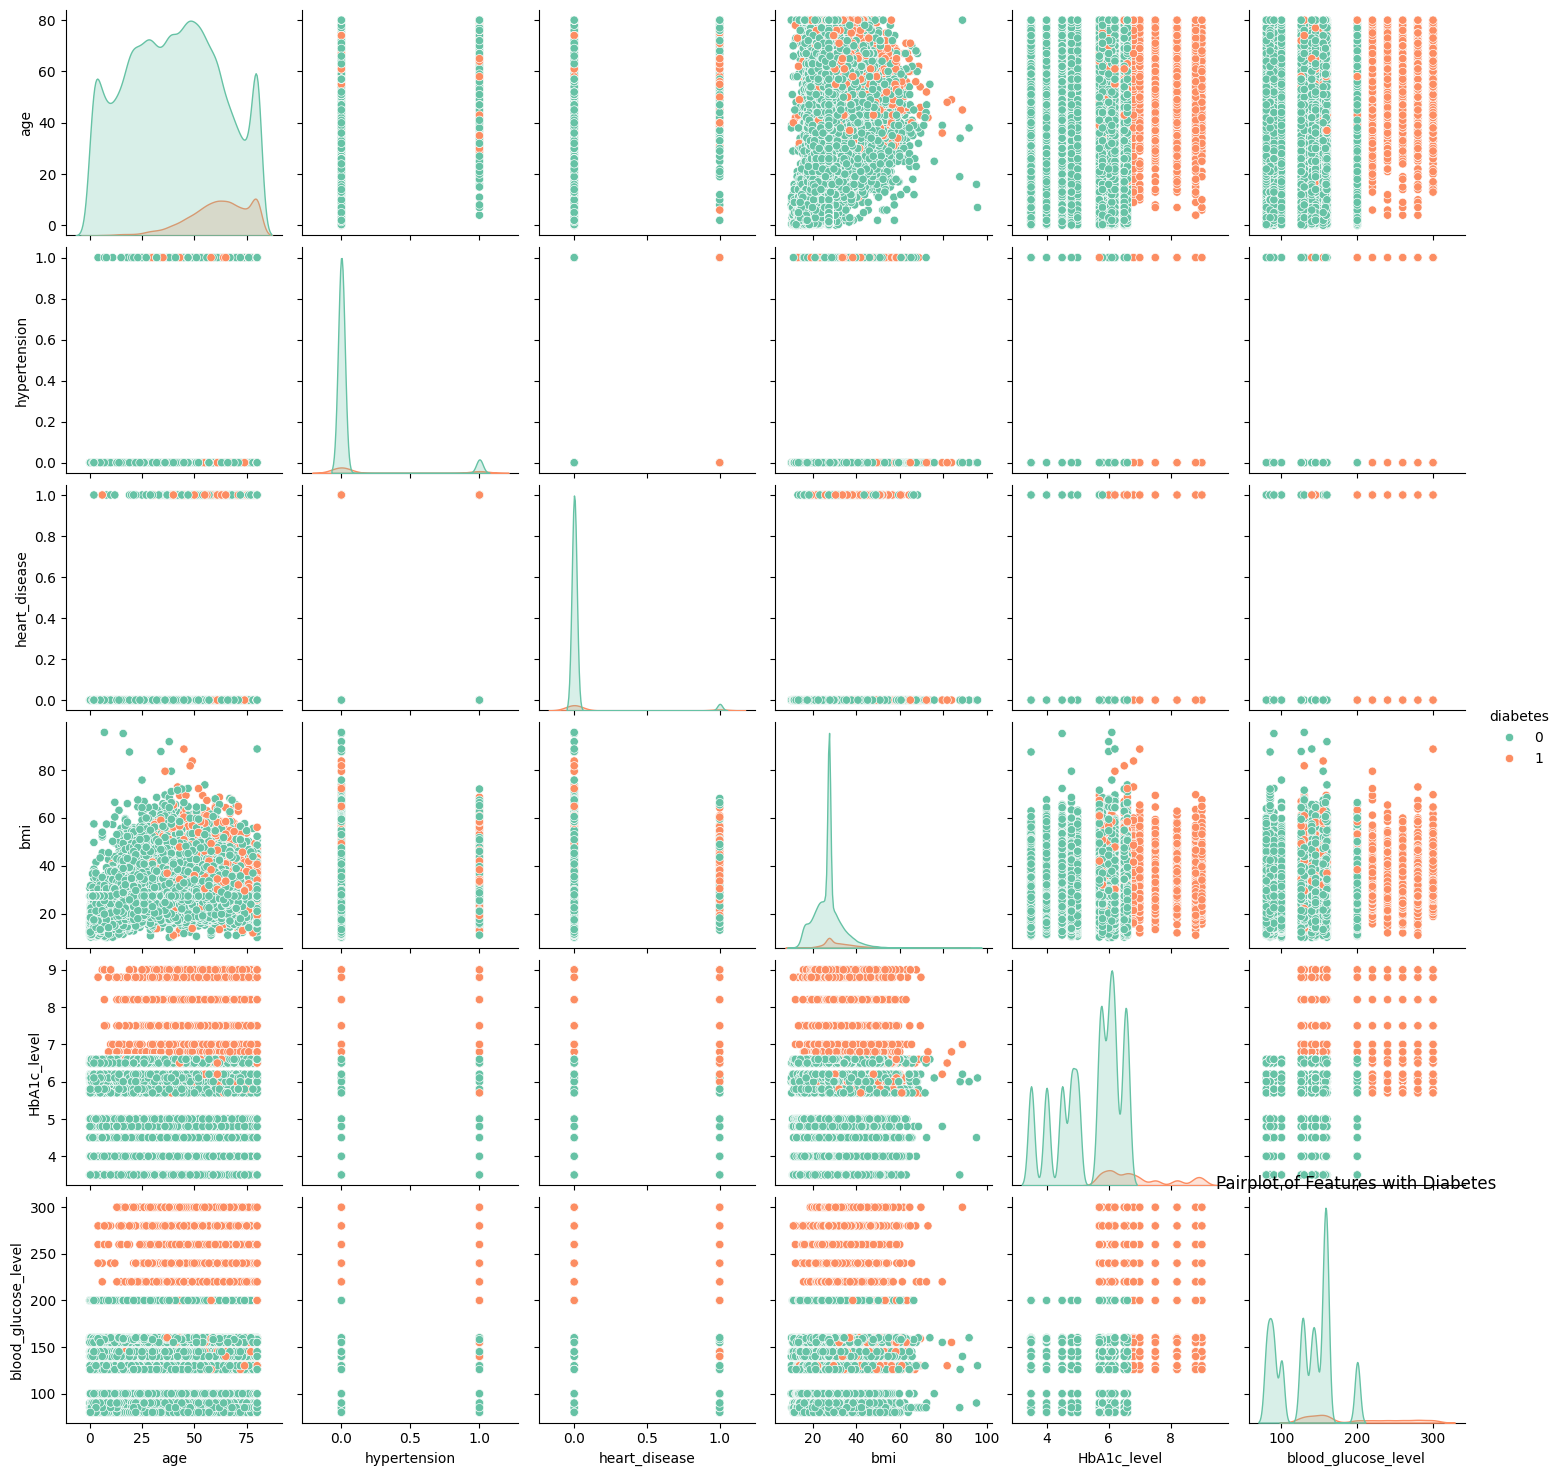

In [88]:
sns.pairplot(df, hue='diabetes', palette='Set2')
plt.title('Pairplot of Features with Diabetes')

In [ ]:
df.to_csv('Data/diabetes_prediction_dataset_cleaned.csv', index=False)

AttributeError: module 'pandas' has no attribute 'to_csv'